In [1]:
%%HTML
<h1>Product Sentiment Analysis</h1>


In [2]:
# Import modules
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Load dataset
products = pd.read_csv('amazon_babyproducts.csv')

(183531, 3)
                                                name  \
0                           Planetwise Flannel Wipes   
1                              Planetwise Wipe Pouch   
2                Annas Dream Full Quilt with 2 Shams   
3  Stop Pacifier Sucking without tears with Thumb...   
4  Stop Pacifier Sucking without tears with Thumb...   

                                              review  rating  
0  These flannel wipes are OK, but in my opinion ...       3  
1  it came early and was not disappointed. i love...       5  
2  Very soft and comfortable and warmer than it l...       5  
3  This is a product well worth the purchase.  I ...       5  
4  All of my kids have cried non-stop when I trie...       5  

5    107054
4     33205
3     16779
1     15183
2     11310
Name: rating, dtype: int64


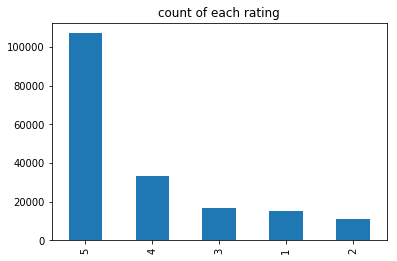

In [4]:
# Understand dataset
print(products.shape)
print(products.head(5))
print()
print(products['rating'].value_counts())
products['rating'].value_counts().plot(kind='bar', title='count of each rating');


In [5]:
#checking null in reviews
print('total NaN in reviews' , products['review'].isnull().sum())
products.loc[products['review'].isnull(),'review']

total NaN in reviews 829


38        NaN
58        NaN
721       NaN
1050      NaN
1183      NaN
1373      NaN
1688      NaN
1689      NaN
2372      NaN
2409      NaN
2838      NaN
3257      NaN
3268      NaN
5036      NaN
5275      NaN
5513      NaN
7755      NaN
7782      NaN
8645      NaN
9456      NaN
9826      NaN
10340     NaN
10362     NaN
10405     NaN
11172     NaN
11611     NaN
11884     NaN
12059     NaN
12616     NaN
13036     NaN
         ... 
178385    NaN
178435    NaN
178462    NaN
178555    NaN
178671    NaN
178865    NaN
179364    NaN
179780    NaN
179857    NaN
179984    NaN
180172    NaN
180503    NaN
180520    NaN
180563    NaN
180610    NaN
180619    NaN
180729    NaN
180851    NaN
181203    NaN
181422    NaN
182018    NaN
182161    NaN
182435    NaN
182460    NaN
183111    NaN
183143    NaN
183220    NaN
183230    NaN
183241    NaN
183344    NaN
Name: review, dtype: object

In [6]:
#Replacing NaN values with spaces
products['review'].fillna(value='',inplace=True)
print(products.loc[38,:])

name      SoftPlay Twinkle Twinkle Elmo A Bedtime Book
review                                                
rating                                               5
Name: 38, dtype: object


## Build Sentiment Analyzer

In [7]:
# PreProcessing
# Remove 3 ratings
products = products.loc[products['rating'] != 3,:]
print(products.shape)
print(products['rating'].value_counts())

(166752, 3)
5    107054
4     33205
1     15183
2     11310
Name: rating, dtype: int64


In [8]:
# Forming sentiments: 4 and 5 rating +ve sentiment, 1 and 2 form -ve sentiment
products['sentiment'] = (products['rating'] >= 4).astype(int)
print(products.head(5))

                                                name  \
1                              Planetwise Wipe Pouch   
2                Annas Dream Full Quilt with 2 Shams   
3  Stop Pacifier Sucking without tears with Thumb...   
4  Stop Pacifier Sucking without tears with Thumb...   
5  Stop Pacifier Sucking without tears with Thumb...   

                                              review  rating  sentiment  
1  it came early and was not disappointed. i love...       5          1  
2  Very soft and comfortable and warmer than it l...       5          1  
3  This is a product well worth the purchase.  I ...       5          1  
4  All of my kids have cried non-stop when I trie...       5          1  
5  When the Binky Fairy came to our house, we did...       5          1  


In [9]:
# Step 1 : Load Data
X = products['review']
y = products['sentiment']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=5)
print(X.size, Xtrain.size , Xtest.size , ytrain.size, ytest.size)

166752 125064 41688 125064 41688


In [10]:
# CountVectorizer : Converts a collection of text documents to a matrix of token counts
vect1 = CountVectorizer()
# Fit : Learn a vocabulary dictionary of all tokens in the raw documents, takes care of stop word removal  & lowercasing
vect1.fit(Xtrain)
# Transform : Transform documents to document-term matrix
Xtrain_dtm = vect1.transform(Xtrain)
print(Xtrain_dtm.shape)

(125064, 55635)


In [11]:
# Step 2: Build Model
log_reg = LogisticRegression()

In [12]:
# Step 3: Learn
log_reg.fit(Xtrain_dtm,ytrain);

In [13]:
# Step 4: Predict
Xtest_dtm = vect1.transform(Xtest)
ypredict = log_reg.predict(Xtest_dtm)

In [14]:
# Step 5: Evaluate
print('accuracy: ' ,metrics.accuracy_score(ytest,ypredict))
print('confusion matrix')
print(metrics.confusion_matrix(ytest,ypredict))
fpr,tpr,threshold = metrics.roc_curve(ytest,ypredict)
print('area under curve: ', metrics.roc_auc_score(ytest,ypredict))


accuracy:  0.932642487047
confusion matrix
[[ 4878  1802]
 [ 1006 34002]]
area under curve:  0.850751616055


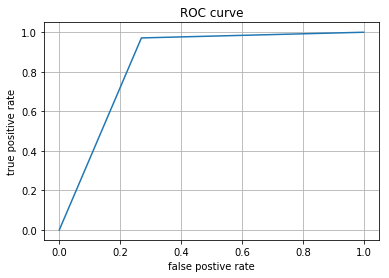

In [15]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')
plt.grid(True)

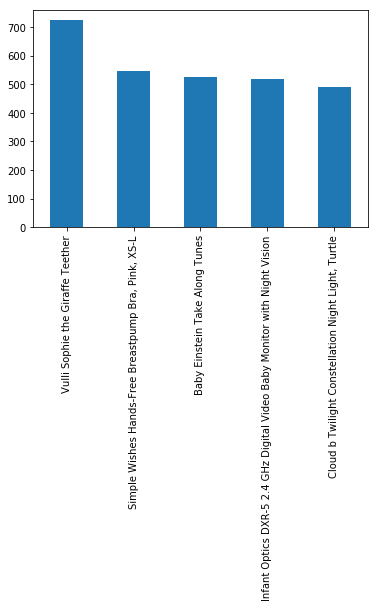

In [16]:
#Top 5 products
products_name5 = products['name'].value_counts().head()
products_name5.plot(kind='bar');

In [17]:
# Probablistic estimates on top product
Giraffe_Teether = products.loc[products['name']=='Vulli Sophie the Giraffe Teether',:]
print(Giraffe_Teether['rating'].value_counts())
Xgt = Giraffe_Teether['review']
ygt = Giraffe_Teether['rating']
Xgt_dtm = vect1.transform(Xgt)
print(Xgt_dtm.shape)

5    535
4     95
1     56
2     37
Name: rating, dtype: int64
(723, 55635)


In [18]:
ygt_prob = log_reg.predict_proba(Xgt_dtm)
ygt_pred = log_reg.predict(Xgt_dtm)
print(ygt_prob.shape)
print(ygt_pred.shape)
print(ygt_prob[:5])
print(ygt_pred[:5])

(723, 2)
(723,)
[[  2.13407012e-03   9.97865930e-01]
 [  5.16326956e-04   9.99483673e-01]
 [  6.21648484e-01   3.78351516e-01]
 [  3.21133219e-02   9.67886678e-01]
 [  5.25514820e-01   4.74485180e-01]]
[1 1 0 1 0]


In [19]:
Giraffe_Teether_indices = Giraffe_Teether.index.values
ygt_prob_df = pd.DataFrame(ygt_prob,index=Giraffe_Teether_indices,columns=['pred_prob0','pred_prob1'])
print(ygt_prob_df.head(5))


       pred_prob0  pred_prob1
34313    0.002134    0.997866
34314    0.000516    0.999484
34315    0.621648    0.378352
34316    0.032113    0.967887
34317    0.525515    0.474485


In [20]:
dict_maxprob = {}
for ind, row in ygt_prob_df.iterrows():
    dict_maxprob[ind] = max(row['pred_prob0'],row['pred_prob1'])

se_maxprob = pd.Series(dict_maxprob)


In [21]:
Giraffe_Teether['pred_prob'] = se_maxprob
print(Giraffe_Teether.head(5))

                                   name  \
34313  Vulli Sophie the Giraffe Teether   
34314  Vulli Sophie the Giraffe Teether   
34315  Vulli Sophie the Giraffe Teether   
34316  Vulli Sophie the Giraffe Teether   
34317  Vulli Sophie the Giraffe Teether   

                                                  review  rating  sentiment  \
34313  He likes chewing on all the parts especially t...       5          1   
34314  My son loves this toy and fits great in the di...       5          1   
34315  There really should be a large warning on the ...       1          0   
34316  All the moms in my moms' group got Sophie for ...       5          1   
34317  I was a little skeptical on whether Sophie was...       5          1   

       pred_prob  
34313   0.997866  
34314   0.999484  
34315   0.621648  
34316   0.967887  
34317   0.525515  


c:\program files (x86)\python35-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
#sorting sentiments based on their high probability
Giraffe_Teether.sort_values('pred_prob',ascending=False, inplace=True)
print(Giraffe_Teether.head(5))


                                   name  \
34892  Vulli Sophie the Giraffe Teether   
34434  Vulli Sophie the Giraffe Teether   
34687  Vulli Sophie the Giraffe Teether   
34442  Vulli Sophie the Giraffe Teether   
34515  Vulli Sophie the Giraffe Teether   

                                                  review  rating  sentiment  \
34892  Sophie, oh Sophie, your time has come. My gran...       5          1   
34434  My Mom-in-Law bought Sophie for my son when he...       5          1   
34687  I wanted to love this product and was excited ...       1          0   
34442  Yes, it's imported. Yes, it's expensive. And y...       5          1   
34515  As every mom knows, you always want to give yo...       5          1   

       pred_prob  
34892        1.0  
34434        1.0  
34687        1.0  
34442        1.0  
34515        1.0  


c:\program files (x86)\python35-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
gt_pos_sorted = Giraffe_Teether.loc[Giraffe_Teether['sentiment']==1,['review']]
print(gt_pos_sorted.head(5))

                                                  review
34892  Sophie, oh Sophie, your time has come. My gran...
34434  My Mom-in-Law bought Sophie for my son when he...
34442  Yes, it's imported. Yes, it's expensive. And y...
34515  As every mom knows, you always want to give yo...
34341  I'll be honest...I bought this toy because all...


In [24]:
gt_neg_sorted = Giraffe_Teether.loc[Giraffe_Teether['sentiment']==0,['review']]
print(gt_neg_sorted.head(5))

                                                  review
34687  I wanted to love this product and was excited ...
34732  Received the product and smells like cheap rub...
34994  When I received this the paint was peeling off...
34824  I got one of these as a showe gift that my bab...
34556  Alright, first off didn't realize this was a s...


In [25]:
list_pos_sorted = []
for i in gt_pos_sorted.head()['review']:
    list_pos_sorted.append(i)

print(list_pos_sorted[0])


Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viole

In [26]:
list_neg_sorted = []
for i in gt_neg_sorted.head()['review']:
    list_neg_sorted.append(i)

print(list_neg_sorted[1])

Received the product and smells like cheap rubber. This is biggest waste of money. I even soaked it in hot water with soap for couple of hours (over a couple of days) but still smells. I ended up tossing this as this was waste of money.


## Build Sentiment Analyzer using specific vocabulary

In [27]:
Xvoc = products['review']
yvoc = products['sentiment']


In [28]:
vect2 = CountVectorizer(vocabulary=['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate'])
vect2.fit(Xvoc)
vect2.get_feature_names()
Xvoc_dtm = vect2.transform(Xvoc)

In [29]:
# Converting sparse matrix to DataFrame
Xvoc_dtm_pd = pd.DataFrame(Xvoc_dtm.toarray(),columns=vect2.get_feature_names(),index=Xvoc.index)
print(Xvoc_dtm_pd.shape)
print(Xvoc_dtm_pd.head(5))

(166752, 11)
   awesome  great  fantastic  amazing  love  horrible  bad  terrible  awful  \
1        0      0          0        0     1         0    0         0      0   
2        0      0          0        0     0         0    0         0      0   
3        0      0          0        0     2         0    0         0      0   
4        0      1          0        0     1         0    0         0      0   
5        0      1          0        0     0         0    0         0      0   

   wow  hate  
1    0     0  
2    0     0  
3    0     0  
4    0     0  
5    0     0  


In [30]:
print(Xvoc_dtm_pd['awesome'].sum())
print(Xvoc_dtm_pd['awesome'].value_counts())

3892
0    163086
1      3475
2       164
3        19
4         8
Name: awesome, dtype: int64


In [31]:
featurecount_dict = {}
for i in vect2.get_feature_names():
    featurecount_dict[i] = Xvoc_dtm_pd[i].sum()
    
print(featurecount_dict)
    

{'horrible': 1110, 'fantastic': 1664, 'amazing': 2628, 'great': 55791, 'hate': 1107, 'wow': 425, 'awesome': 3892, 'terrible': 1146, 'love': 41994, 'bad': 4183, 'awful': 687}


In [32]:
Xvoc = products['review']
yvoc = products['sentiment']

Xvoctrain, Xvoctest, yvoctrain, yvoctest = train_test_split(Xvoc,yvoc,random_state=5)
print(Xvoc.shape, Xvoctrain.shape , Xvoctest.shape , yvoctrain.shape, yvoctest.shape)


(166752,) (125064,) (41688,) (125064,) (41688,)


In [33]:
vect2.fit(Xvoctrain)
Xvoctrain_dtm = vect2.transform(Xvoctrain)

In [34]:
log_reg2 = LogisticRegression()
log_reg2.fit(Xvoctrain_dtm,yvoctrain);

In [35]:
print(vect2.get_feature_names())
# we can see +ve weights for positive words and -ve weights for negative words
print(log_reg2.coef_)
print(log_reg2.intercept_)

['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']
[[ 1.09577027  0.88532747  0.8482785   0.9537253   1.36665798 -2.31490585
  -0.95516119 -2.07273227 -1.97868032 -0.10830904 -1.34997589]]
[ 1.33212269]


In [36]:
Xvoctest_dtm = vect2.transform(Xvoctest)
yvocpredict = log_reg2.predict(Xvoctest_dtm)

In [37]:
print('accuracy: ' , metrics.accuracy_score(yvoctest,yvocpredict))
print('confusion matrix')
print(metrics.confusion_matrix(yvoctest,yvocpredict))
fpr,tpr,threshold = metrics.roc_curve(yvoctest,yvocpredict)
print('roc_auc: ' , metrics.roc_auc_score(yvoctest,yvocpredict))

accuracy:  0.847294185377
confusion matrix
[[  493  6187]
 [  179 34829]]
roc_auc:  0.534344639104


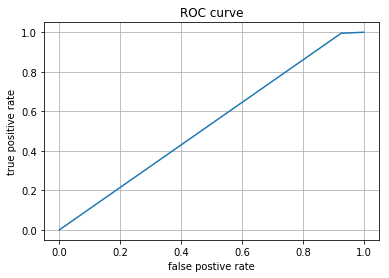

In [38]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')
plt.grid(True)